# Ch1 Linear Equations and LU Decomposition

<a target="_blank" href="https://colab.research.google.com/github/DrJaewookLee/math4ai-notes/blob/main/Notebooks/ch01_Linear_Equations_and_LU_Decomposition.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## 1.1 Vector and Matrices

In [106]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

In [107]:
# Environment information
try:
    from scipy import sparse
    SCIPY_AVAILABLE = True
except Exception:
    SCIPY_AVAILABLE = False

print("NumPy version", np.__version__)
print("SciPy available (for sparse demo)", SCIPY_AVAILABLE)

NumPy version 2.0.2
SciPy available (for sparse demo) True


### 1.1.1 Vector and Matrices

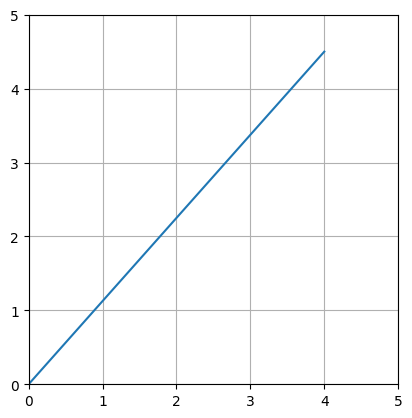

In [108]:
# Create and plot a 2D vector
v = np.array([4,4.5])

plt.plot([0,v[0]],[0,v[1]])
plt.axis('square')
plt.axis([0,5,0,5])
plt.grid('on')
plt.show()

In [109]:
# List vs. array
v_list = [2, 4, 6, 8]
v_array = np.array([2, 4, 6, 8])

print(v_list)
print(v_array)

[2, 4, 6, 8]
[2 4 6 8]


In [110]:
# Row/column vectors
v_row = np.array([[2, 4, 6, 8]])
v_col = np.array([[2], [4], [6], [8]])

print(v_row)
print(v_col)

[[2 4 6 8]]
[[2]
 [4]
 [6]
 [8]]


In [111]:
# Transpose: 1D arrays
print(v_row.T)
print(v_array.T)

[[2]
 [4]
 [6]
 [8]]
[2 4 6 8]


In [113]:
# Identity matrix
I = np.eye(4)
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [114]:
# Ones matrix
O = np.ones((4, 4))
print(O)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [115]:
# Zero matrix
Z = np.zeros((4, 4)) 
print(Z)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [116]:
# Diagonal matrix
D = np.diag([2, -3, 5, 1])
print(D)

[[ 2  0  0  0]
 [ 0 -3  0  0]
 [ 0  0  5  0]
 [ 0  0  0  1]]


In [117]:
# Extract diagonal from a random matrix
R = np.random.randn(4, 5)
print(np.diag(R))

[-2.55298982  0.04575852 -0.88778575 -0.38732682]


In [118]:
# Two matrices
A = np.random.randn(4, 4)
print(A)

[[-1.04855297 -1.42001794 -1.70627019  1.9507754 ]
 [-0.50965218 -0.4380743  -1.25279536  0.77749036]
 [-1.61389785 -0.21274028 -0.89546656  0.3869025 ]
 [-0.51080514 -1.18063218 -0.02818223  0.42833187]]


In [119]:
B = np.random.randn(4, 3)
print(B)

[[ 0.06651722  0.3024719  -0.63432209]
 [-0.36274117 -0.67246045 -0.35955316]
 [-0.81314628 -1.7262826   0.17742614]
 [-0.40178094 -1.63019835  0.46278226]]


In [120]:
# Concatenate two matrices along columns
AB = np.concatenate((A, B), axis=1)
print(AB)

[[-1.04855297 -1.42001794 -1.70627019  1.9507754   0.06651722  0.3024719  -0.63432209]
 [-0.50965218 -0.4380743  -1.25279536  0.77749036 -0.36274117 -0.67246045 -0.35955316]
 [-1.61389785 -0.21274028 -0.89546656  0.3869025  -0.81314628 -1.7262826   0.17742614]
 [-0.51080514 -1.18063218 -0.02818223  0.42833187 -0.40178094 -1.63019835  0.46278226]]


In [121]:
# Extract the lower triangle
LT = np.tril(A)
print(LT)

[[-1.04855297  0.          0.          0.        ]
 [-0.50965218 -0.4380743   0.          0.        ]
 [-1.61389785 -0.21274028 -0.89546656  0.        ]
 [-0.51080514 -1.18063218 -0.02818223  0.42833187]]


In [122]:
# Extract the upper triangle
UT = np.triu(A)
print(UT)

[[-1.04855297 -1.42001794 -1.70627019  1.9507754 ]
 [ 0.         -0.4380743  -1.25279536  0.77749036]
 [ 0.          0.         -0.89546656  0.3869025 ]
 [ 0.          0.          0.          0.42833187]]


### 1.1.2 Matrix Multiplication

In [69]:
# Import library
import numpy as np

In [123]:
# Matrices
A = np.array([[ 3,  1, -1],
              [ 0,  2,  4],
              [ 1, -3,  5]])
B = np.array([[ 2, -1,  0],
              [ 1,  3,  2],
              [-2,  4,  1]])

print("(Shape, Size, Ndim):", (A.shape, A.size, A.ndim))

(Shape, Size, Ndim): ((3, 3), 9, 2)


In [124]:
# Reshape to 3x3 matrix
A.reshape(3,3)

array([[ 3,  1, -1],
       [ 0,  2,  4],
       [ 1, -3,  5]])

In [125]:
# Flatten to 1D
A_flat = A.flatten()
print(A_flat)

[ 3  1 -1  0  2  4  1 -3  5]


In [126]:
# Reshape to 1D
A_reshaped = A.reshape(-1)
print(A_reshaped)

[ 3  1 -1  0  2  4  1 -3  5]


In [127]:
# Change the element at position (0, 0)
A[0][0] = 7

A_reshaped # reshaped reflects the changes made to the original array

array([ 7,  1, -1,  0,  2,  4,  1, -3,  5])

In [128]:
# Indexing/slicing
print("(Row 3, col 2):", A[2, 1])
print("Top 2 rows:", "\n", A[:2, :])
print("Second column:","\n", A[:, 1:2])

(Row 3, col 2): -3
Top 2 rows: 
 [[ 7  1 -1]
 [ 0  2  4]]
Second column: 
 [[ 1]
 [ 2]
 [-3]]


In [129]:
# Trace
print(np.trace(A))
print(A.trace())
print(sum(A.diagonal()))

14
14
14


In [130]:
# Offset traces
print(np.trace(A, offset=1)) #above main diagonal
print(np.trace(A, offset=-1)) #below main diagonal

5
-3


In [131]:
# Max element
print(np.max(A)) # maximum element in the whole array
print(np.max(A, axis=0)) # maximum of each column
print(np.max(A, axis=1)) # maximum of each row

7
[7 2 5]
[7 4 5]


In [132]:
# Sum
print(A + B)

[[ 9  0 -1]
 [ 1  5  6]
 [-1  1  6]]


In [133]:
# Subtract
print(A - B)

[[ 5  2 -1]
 [-1 -1  2]
 [ 3 -7  4]]


In [134]:
# Matrix product
print(A @ B)
print(np.matmul(A, B))

[[ 17  -8   1]
 [ -6  22   8]
 [-11  10  -1]]
[[ 17  -8   1]
 [ -6  22   8]
 [-11  10  -1]]


In [135]:
# Hadamard product
print(A*B)

[[ 14  -1   0]
 [  0   6   8]
 [ -2 -12   5]]


In [137]:
# Vectorize vs Broadcasting

# Define add 5 function
add_5 = lambda i: i+5

# Vectorized function
vectorized_add_5 = np.vectorize(add_5)
print(vectorized_add_5(A))

[[12  6  4]
 [ 5  7  9]
 [ 6  2 10]]


In [138]:
# Broadcasting
print(A + 5)

[[12  6  4]
 [ 5  7  9]
 [ 6  2 10]]


In [139]:
# Broadcasting (row)
print(A + np.array([10, 20, 30]))

[[17 21 29]
 [10 22 34]
 [11 17 35]]


In [140]:
# Broadcasting (column)
print(np.array([[100], [200], [300]]))

[[100]
 [200]
 [300]]


In [141]:
# High-dimensional matmul with batch broadcasting
TA = np.random.rand(3, 1, 2, 4) 
TB = np.random.rand(1, 5, 4, 3)
print(np.matmul(TA, TB).shape)

(3, 5, 2, 3)


In [142]:
# Vectors
v1 = np.array([3, -1, 2])
v2 = np.array([1, 4, -2])
v3 = np.array([0, 5, 5])

# Scalars
coeff = np.array([2, -1, 0.5])

# Linear combination
v_lin = coeff[0]*v1 + coeff[1]*v2 + coeff[2]*v3
print(v_lin)


[ 5.  -3.5  8.5]


In [143]:
# Slicing examples
print("Last element", v1[-1])
print("From 2nd to end", v1[1:])
print("First two", v1[:2])

Last element 2
From 2nd to end [-1  2]
First two [ 3 -1]


In [146]:
# Dot / outer / elementwise (Hadamard) product
v_dp = np.dot(v1, v2)
v_op = np.outer(v1, v2)
v_hadamard = v1 * v2
print("Dot product:", v_dp)
print("Outer product:", "\n", v_op)
print("Elementwise product:", v_hadamard)

Dot product: -5
Outer product: 
 [[ 3 12 -6]
 [-1 -4  2]
 [ 2  8 -4]]
Elementwise product: [ 3 -4 -4]


In [147]:
# Norm
norm_v1 = np.linalg.norm(v1)
print(norm_v1)

# Unit Vector
v1_unit = v1 / norm_v1
print(v1_unit)

3.7416573867739413
[ 0.80178373 -0.26726124  0.53452248]


In [148]:
# Average via dot product
values = np.array([12, 15, -3, 9, 0, 6])
avg = np.dot(values, np.ones_like(values, dtype=float)) / len(values)
print(avg)

6.5


In [149]:
# Simple broadcasting examples
base = np.array([10, 20, 30])
print(base + 100)
print(base + np.array([1, 2, 3]))

[110 120 130]
[11 22 33]


## 1.2 LU Decomposition

### 1.2.1 Gaussian Elimination

In [150]:
# import library
import numpy as np
np.set_printoptions(suppress=True, linewidth=120)

In [151]:
# Gaussian elimination to U

# Define back substitution function
def back_sub(U, y):
    n = U.shape[0]
    x = np.zeros_like(y, dtype=float)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - U[i,i+1:] @ x[i+1:]) / U[i,i]
    return x

In [152]:
# Define linear equation
A = np.array([[ 1.,  2.,  1.],
              [ 2., -1.,  1.],
              [ 3.,  1., -1.]], dtype=float)
b = np.array([5., 0., 2.], dtype=float)

U = A.copy(); rhs = b.copy()
n = A.shape[0]

In [153]:
# Solve linear equation

# Forward elimiination
for k in range(n-1):
    for i in range(k+1, n):
        m = U[i,k] / U[k,k]
        U[i,k:] -= m * U[k,k:]
        rhs[i]  -= m * rhs[k]

# Back substitution
x = back_sub(U, rhs)                  

print("Upper triangular form:", "\n", U)   
print("Transformed Right Hand Side:",rhs)   
print("Solution:", x)      

Upper triangular form: 
 [[ 1.  2.  1.]
 [ 0. -5. -1.]
 [ 0.  0. -3.]]
Transformed Right Hand Side: [  5. -10.  -3.]
Solution: [0.4 1.8 1. ]


In [154]:
# LU decomposition (no pivoting)

# Define forward substitution function
def forward_sub(L, b):
    # solve L y = b (lower triangular)
    n = L.shape[0]
    y = np.zeros_like(b, dtype=float)
    for i in range(n):
        y[i] = (b[i] - L[i,:i] @ y[:i]) / L[i,i]
    return y

In [155]:
# Define linear equation
A = np.array([[2., 1., 1.],
              [4., -6., 0.],
              [-2., 7., 2.]], dtype=float)
b = np.array([5., -2., 9.], dtype=float)

n = A.shape[0]
L = np.zeros_like(A); U = np.zeros_like(A)



In [157]:
# Solve linear equation

# LU Decomposition
for i in range(n): # Doolittle method: set diag(L)=1
    for j in range(i, n):
        U[i,j] = A[i,j] - L[i,:i] @ U[:i,j]
    L[i,i] = 1.0
    for j in range(i+1, n):
        L[j,i] = (A[j,i] - L[j,:i] @ U[:i,i]) / U[i,i]

y = forward_sub(L, b)
x = back_sub(U, y)

print("Unit lower triangular:","\n", L)   
print("Upper triangular:", "\n", U) 
print("Solution:",x)  

Unit lower triangular: 
 [[ 1.  0.  0.]
 [ 2.  1.  0.]
 [-1. -1.  1.]]
Upper triangular: 
 [[ 2.  1.  1.]
 [ 0. -8. -2.]
 [ 0.  0.  1.]]
Solution: [1. 1. 2.]


In [158]:
# LU decomposition with pivoting

# Define linear equation
A = np.array([[0., 2., 1.],      # zero pivot example
              [2., 1., 1.],
              [3., 1., -1.]], dtype=float)
b = np.array([4., 5., 6.], dtype=float)

In [159]:
# Solve linear equation using LU decomposition + Pivoting
try:
    # SciPy route (stable & fast)
    from scipy.linalg import lu, lu_factor, lu_solve

    P, L, U = lu(A)                 # PA = LU (for inspection)
    lu_fac, piv = lu_factor(A)      # one-time factorization
    x = lu_solve((lu_fac, piv), b)  # solve Ax=b using the factors

    print("P:\n", P)
    print("L:\n", L)
    print("U:\n", U)
    print("x:\n", x)

except ImportError:
    # Minimal educational implementation of partial pivoting
    U = A.copy(); P = np.eye(A.shape[0]); L = np.zeros_like(A)
    n = A.shape[0]
    for k in range(n-1):
        p = k + np.argmax(np.abs(U[k:, k]))  # pivot row
        if p != k:
            U[[k, p]] = U[[p, k]]
            P[[k, p]] = P[[p, k]]
            L[[k, p], :k] = L[[p, k], :k]
        for i in range(k+1, n):
            L[i, k] = U[i, k] / U[k, k]
            U[i, k:] -= L[i, k] * U[k, k:]
    np.fill_diagonal(L, 1.0)

    # Solve PAx = LUx = Pb
    def forward_sub(L, b):
        n = L.shape[0]
        y = np.zeros_like(b, dtype=float)
        for i in range(n):
            y[i] = (b[i] - L[i, :i] @ y[:i]) / L[i, i]
        return y

    def back_sub(U, y):
        n = U.shape[0]
        x = np.zeros_like(y, dtype=float)
        for i in range(n-1, -1, -1):
            x[i] = (y[i] - U[i, i+1:] @ x[i+1:]) / U[i, i]
        return x

    y = forward_sub(L, P @ b)
    x = back_sub(U, y)

    print("P:\n", P)
    print("L:\n", L)
    print("U:\n", U)
    print("x:\n", x)

P:
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
L:
 [[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.66666667 0.16666667 1.        ]]
U:
 [[ 3.   1.  -1. ]
 [ 0.   2.   1. ]
 [ 0.   0.   1.5]]
x:
 [1.44444444 1.88888889 0.22222222]


### 1.2.2 Inverse and Gauss-Jordan Method

In [160]:
# import library & setup
import numpy as np
np.set_printoptions(suppress=True, linewidth=120)

In [161]:
# Create matrix
A = np.array([[2., 1., 0.],
              [1., 2., 1.],
              [0., 1., 2.]], dtype=float)

n = A.shape[0]
AI = np.hstack([A, np.eye(n)])

In [162]:
# Gauss-Jordan method for inverse matrix
for i in range(n):
    AI[i] = AI[i] / AI[i,i]   
    for j in range(n):
        if j != i:
            AI[j] -= AI[j,i] * AI[i]     
A_inv = AI[:, n:]

print(A_inv)          

[[ 0.75 -0.5   0.25]
 [-0.5   1.   -0.5 ]
 [ 0.25 -0.5   0.75]]


In [163]:
print(A @ A_inv)       # should be I

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### 1.2.3. Sparse Matrix

In [164]:
# Import library
import numpy as np
from scipy import sparse

In [165]:
# Create matrix
matrix = np.array([
        [0, 0, 7, 0, 0],
        [0, 5, 0, 0, 1],
        [4, 0, 0, 0, 0],
        [0, 0, 2, 0, 0],
    ])

# Create CSR (compressed sparse row) matrix
matrix_sparse = sparse.csr_matrix(matrix)

print(matrix_sparse)

  (np.int32(0), np.int32(2))	7
  (np.int32(1), np.int32(1))	5
  (np.int32(1), np.int32(4))	1
  (np.int32(2), np.int32(0))	4
  (np.int32(3), np.int32(2))	2


In [166]:
# Create larger matrix
matrix_large = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                         [3, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# Create CSR matrix
matrix_large_sparse = sparse.csr_matrix(matrix_large)

print(matrix_large_sparse)

  (np.int32(1), np.int32(1))	1
  (np.int32(2), np.int32(0))	3


## 1.3 Determinants

### 1.3.2 The Properties of the determinant

In [167]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

In [168]:
# Create matrix
A = np.array([[1, 3, 5],
              [2, 5, 1],
              [2, 3, 8]])

# Determinant
determinant = linalg.det(A)
print(determinant)

-25.000000000000004


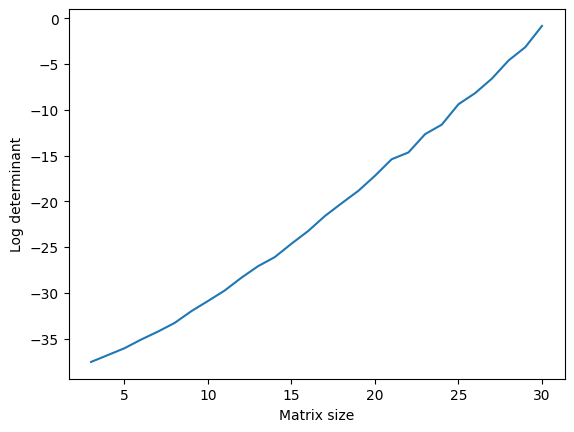

In [169]:
# matrix sizes
ns = np.arange(3,31)

# iteration
iters = 100

# initialize
dets = np.zeros((len(ns),iters))

# loop over matrix sizes
for ni in range(len(ns)):
    for i in range(iters):
        
        # step 1
        A = np.random.randn(ns[ni],ns[ni])
        
        # step 2
        A[:,0] = A[:,1]
        
        # step 3
        dets[ni,i]=np.abs(np.linalg.det(A))
        

# plotting
plt.plot(ns,np.log(np.mean(dets,axis=1)))
plt.xlabel('Matrix size')
plt.ylabel('Log determinant')
plt.show()

## 1.4 The Cholesky factorization

### 1.4.1. Symmetric positive definite matrix

In [170]:
# Import library
import numpy as np

# Create a symmetric matrix
A = np.array([[2, -1],
              [-1, 2]], dtype=float)

In [171]:
# Check symmetry
print("A is symmetric?", np.allclose(A, A.T))

A is symmetric? True


In [172]:
# Test x^T A x > 0 for random vectors x
for _ in range(5):
    x = np.random.randn(2)
    val = float(x.T @ A @ x)
    print(f"x={x.round(3)},  x^T A x={val:.4f}")

x=[0.46  0.998],  x^T A x=1.4964
x=[ 0.536 -0.651],  x^T A x=2.1216
x=[0.737 0.179],  x^T A x=0.8856
x=[0.538 0.144],  x^T A x=0.4662
x=[0.712 0.223],  x^T A x=0.7950


### 1.4.2. The Cholesky factorization

In [173]:
# Import library
import numpy as np

In [174]:
# Cholesky factorization
A = np.array([[4, 2],
              [2, 3]], dtype=float)

L = np.linalg.cholesky(A) 
print("Cholesky factor L:\n", np.round(L, 3))
print("Check: L @ L.T =\n", np.round(L @ L.T, 3))

Cholesky factor L:
 [[2.    0.   ]
 [1.    1.414]]
Check: L @ L.T =
 [[4. 2.]
 [2. 3.]]


In [175]:
# Solve Ax=b using Cholesky decomposition (if A is SPD)
A = np.array([[25, 15, -5],
              [15, 18,  0],
              [-5,  0, 11]], dtype=float)
b = np.array([35, 33, 6], dtype=float)

# Factorization
L = np.linalg.cholesky(A)

# Forward + backward substitution
y = np.linalg.solve(L, b)       
x = np.linalg.solve(L.T, y) 

print("Solution x:", np.round(x, 4))
print("A @ x:", np.round(A @ x, 4))
print("b:",b)

Solution x: [1. 1. 1.]
A @ x: [35. 33.  6.]
b: [35. 33.  6.]


In [176]:
# Least squares using Cholesky decomposition

np.random.seed(0)
A = np.random.randn(5, 3)   # 5 eqs, 3 unknowns
x_true = np.array([1, 2, -1])
b = A @ x_true + 0.01*np.random.randn(5)   # noisy b

# Normal equations
AtA = A.T @ A
Atb = A.T @ b

# Solve using Cholesky Decomposition
L = np.linalg.cholesky(AtA)    
y = np.linalg.solve(L, Atb)          # solve L y = A^T b
x_est = np.linalg.solve(L.T, y)      # solve L^T x = y

print("Estimated x:", np.round(x_est, 3))
print("True x:", x_true)

Estimated x: [ 0.998  2.011 -0.999]
True x: [ 1  2 -1]
